In [1]:
library('igraph')
library('Matrix')
library('pracma')
library(repr)
options(repr.plot.width=4,repr.plot.height=4)
options(repr.hist.width=4,repr.hist.height=4)

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [2]:
#2.3.a
g <- barabasi.game(1000, m=4, directed=TRUE)

In [3]:
#Q2.3.a and b
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

#Random walk: counting vists of last node only
random_walk_prob = function (g, num_steps, start_node, alpha, transportation, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    count = seq(0,0,length.out=1000)
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        PMF = (1-alpha)*PMF + alpha*transportation
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    count[v]<-count[v]+1
    return(count)
}

In [4]:
#Second approach of random walk: counting visits to each node (and not only last node)
random_walk_1 = function (g, num_steps, start_node, alpha, transportation, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    
    count = seq(0,0,length.out=1000)
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        PMF = (1-alpha)*PMF + alpha*transportation
        v = sample(1:vcount(g), 1, prob = PMF)
        count[v]<-count[v]+1
    }
    count<-count/num_steps
    return(count)
}

In [5]:
#Q2.3.a
#Perform random walk for page rank ; count visits of last node only
count_total<-seq(0,0,length.out=1000)
prob <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0, 0.001)
    count_total<- count_total+cnt
}
prob<-count_total/100
prob

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

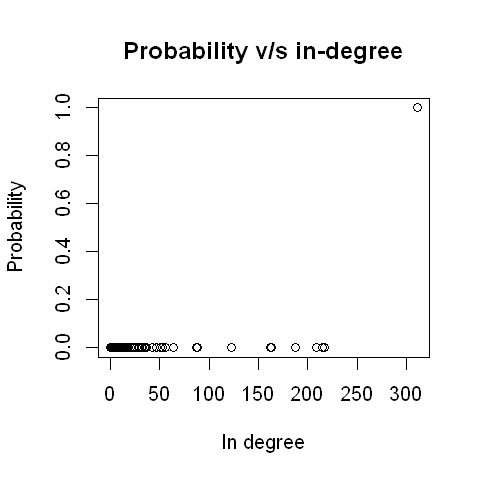

In [6]:
plot(degree(g,mode='in'), prob, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

In [7]:
#Perform random walk for page rank
#count visits of all nodes
count_total_1<-seq(0,0,length.out=1000)
prob_1 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_1(g, 100, v_start, 0, 0.001)
    count_total_1<- count_total_1+cnt
}
prob_1<-count_total_1/100
prob_1

[1] 0.9767 0.0042 0.0026 0.0030 0.0010 0.0000 0.0012 0.0004 0.0005 0.0011
  [11] 0.0007 0.0000 0.0002 0.0003 0.0000 0.0001 0.0000 0.0001 0.0001 0.0000
  [21] 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000 0.0005 0.0000 0.0001 0.0001
  [31] 0.0001 0.0003 0.0000 0.0002 0.0003 0.0000 0.0001 0.0000 0.0003 0.0006
  [41] 0.0000 0.0002 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0001
  [51] 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000 0.0000 0.0001 0.0001 0.0000
  [61] 0.0002 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000
  [71] 0.0000 0.0001 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000
  [81] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
  [91] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0001 0.0001 0.0000 0.0000 0.0000
 [101] 0.0000 0.0000 0.0000 0.0000 0.0001 0.0001 0.0000 0.0000 0.0000 0.0000
 [111] 0.0001 0.0001 0.0000 0.0000 0.0000 0.0000 0.0001 0.0002 0.0000 0.0000
 [121] 0.0000 0.0001 0.0001 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
 [131] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [141] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [151] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000
 [161] 0.0000 0.0000 0.0000 0.0002 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
 [171] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [181] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001
 [191] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000
 [201] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000
 [211] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [221] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [231] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [241] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [251] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000
 [261] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [271] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [281] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [291] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
 [301] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [311] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [321] 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [331] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [341] 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [351] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [361] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [371] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [381] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [391] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [401] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [411] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [421] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [431] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000
 [441] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [451] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0001 0.0000 0.0000 0.0000 0.0000
 [461] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [471] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [481] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [491] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [501] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
 [511] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

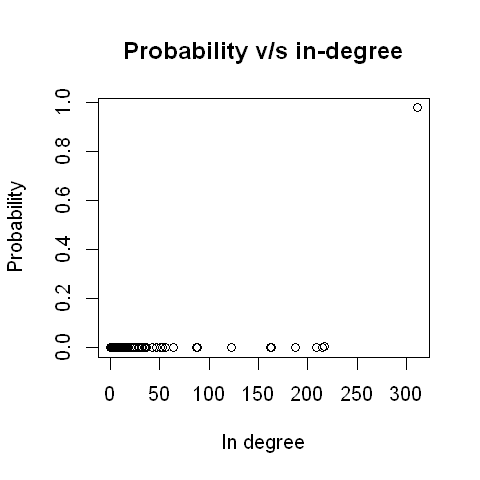

In [8]:
plot(degree(g,mode='in'), prob_1, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

In [10]:
#Q2.3.b
#Perform random walk for page rank with alpha=0.15
count_total_2<-seq(0,0,length.out=1000)
prob_2 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, 0.001)
    count_total_2<- count_total_2+cnt
}
prob_2<-count_total_2/100
prob_2

[1] 0.61 0.05 0.07 0.01 0.03 0.00 0.01 0.00 0.01 0.00 0.01 0.00 0.00 0.00
  [15] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [29] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01
  [43] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00
  [57] 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00
  [71] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [85] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [99] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [113] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [127] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [141] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [155] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [169] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00
 [183] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [197] 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [211] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [225] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [239] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [253] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [267] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00
 [281] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [295] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
 [309] 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00
 [323] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [337] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [351] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [365] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [379] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [393] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [407] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [421] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [435] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [449] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [463] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [477] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [491] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [505] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [519] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [533] 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [547] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [561] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [575] 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [589] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [603] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [617] 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [631] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [645] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [659] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [673] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [687] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [701] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [715] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

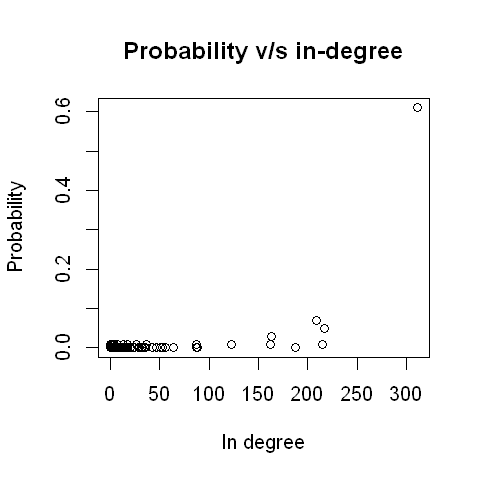

In [11]:
plot(degree(g,mode='in'), prob_2, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

In [12]:
#Q2.4.a
count_total_3<-seq(0,0,length.out=1000)
prob_3 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, prob)
    count_total_3<- count_total_3+cnt
}
prob_3<-count_total_3/100
prob_3

[1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0

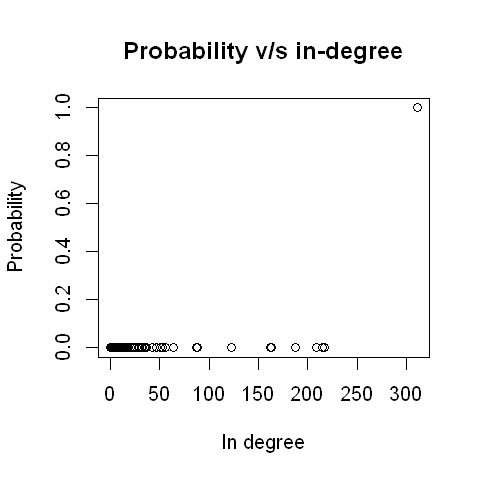

In [13]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

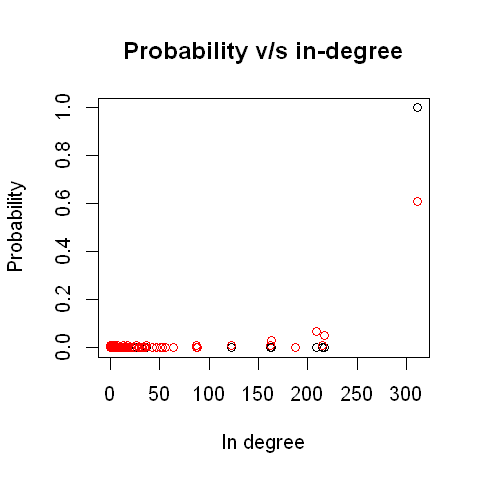

In [17]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")
points(degree(g,mode='in'), prob_2, col="red")

In [33]:
sampled_vertices = sample(2:vcount(g), 2)
prob_modified<-seq(0,0,length.out=1000)
prob_modified[sampled_vertices[1]]=0.5
prob_modified[sampled_vertices[2]]=0.5

In [43]:
prob_modified<-seq(0,0,length.out=1000)
prob_modified[sampled_vertices[1]]=0.5
prob_modified[sampled_vertices[2]]=0.5

In [49]:
shortest.paths(g,545,4)
shortest.paths(g,398,4)

2


2


In [44]:
#2.4.b


count_total_4<-seq(0,0,length.out=1000)
prob_4 <- c()
for (i in seq(1,100,1)) {
    v_start = sample(vcount(g), 1)
    cnt = random_walk_prob(g, 100, v_start, 0.15, prob_modified)
    count_total_4<- count_total_4+cnt
}
prob_4<-count_total_4/100
prob_4

[1] 0.61 0.06 0.02 0.02 0.00 0.00 0.01 0.00 0.00 0.01 0.02 0.00 0.01 0.00
  [15] 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [29] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [43] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.00 0.00
  [57] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [71] 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [85] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  [99] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [113] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [127] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [141] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [155] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [169] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [183] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [197] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [211] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [225] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [239] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [253] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [267] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [281] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [295] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [309] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [323] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [337] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [351] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [365] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [379] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [393] 0.00 0.00 0.00 0.00 0.00 0.10 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [407] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [421] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [435] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [449] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [463] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [477] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [491] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [505] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [519] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [533] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 0.00
 [547] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [561] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [575] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [589] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [603] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [617] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [631] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [645] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [659] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [673] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [687] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [701] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 [715] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00

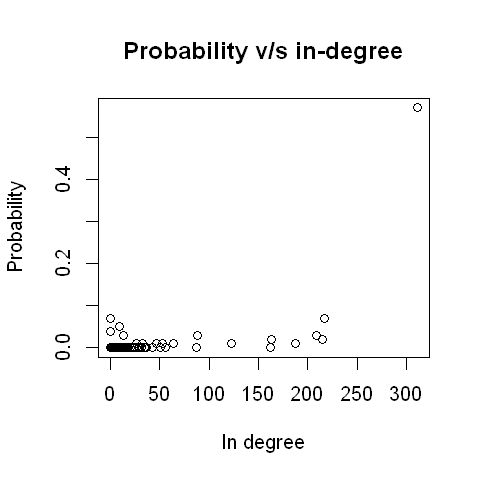

In [19]:
plot(degree(g,mode='in'), prob_4, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")

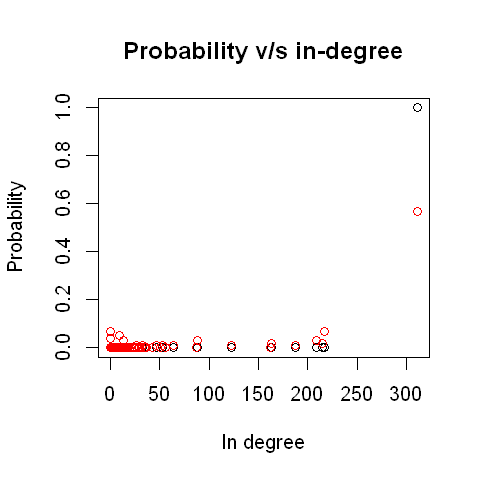

In [22]:
plot(degree(g,mode='in'), prob_3, main="Probability v/s in-degree", xlab="In degree", ylab="Probability")
points(degree(g,mode='in'), prob_4, col="red")

In [24]:
degree(g,mode='in')

[1] 311 217 209 215 163   0 162  64  87 187 123  51  87  15  88  42   5  53
  [19]  12   3   2   5  15  14  10   1  28   0  13   2   4  35   3   8  34   1
  [37]  17  26  46  31  14  13   6   7   1  10  11  23  10  32   1   0   0  36
  [55]   3  16   3  20  24   7  26   2  28   1   2  15  15   6  17  24   2  56
  [73]   8  10   9   4   0  10   1   4   2   0   0   3  20   6   3   2   3   8
  [91]   5   6   5   1  11  16  10   2   0   1   7   5  11   1   5   6   2   1
 [109]   4   5  14  20   3   3   4   3   8   6   2   8   0  11  12   3   0   6
 [127]   0   6   2   3  11   2   0   1   2  15   7   3   9   1   8   5   1   4
 [145]   1   1   3   0   3   0   1   7   1  13   0   6   0   1   1   2   0   0
 [163]   2   9   0   4  29   6   2   1   2   3   0   1   7   1   2   1   0   0
 [181]   2   3   4   9   6   2   2   4   0   3   0   8   0   4   5   0   5   7
 [199]   2   1   4   5   3   0   0   2  10   1   3   0   4   1   3   6   1   3
 [217]   2   2   3   6   0   1   7   2   5   3   7   3   1   0   4   2   3   0
 [235]  10   0   2   1   1   3   0   0   1   1   1  11   1   1   2   1   1   2
 [253]   1   3   1   5   0   4   1   1   1   0   1   2   0   1   3   0   1   2
 [271]   6   1   0   1   1   3   1   0   3   0   0   4   0   1   1   0   0  10
 [289]   3   1   0   6   4   9   2  14   8   0   2   3   4   4   1   5   5   0
 [307]   2   0   2   1   0   0   0   2   1   1   0   3   0   2   0   1   1   3
 [325]  13   6   1   0   0   2   2   0   0   0   0   0   4   5   0   3   0   0
 [343]   1   3   0   1   0   4   0   0   3   2   3   3   3   1   0   0   2   1
 [361]   0   2   3   1   0   0   0   1   3   0   3   1   0   0   1   0   0   4
 [379]   0   2   1   0   0   0   1   0   3   1   2   0   0   1   1   2   4   2
 [397]   0   1   4   0   1   0   0   0   0   0   0   0   0   0   1   2   2   0
 [415]   0   0   0   2   2   0   0   0   1   1   1   0   0   0   0   3   0   0
 [433]   0   2   0   0   1   1   0   0   2   0   1   3   1   1   1   0   4   0
 [451]   0   2   0   1   1   1   2   2   0   0   0   3   0   0   0   1   0   3
 [469]   1   1   0   0   0   0   1   1   1   1   0   0   0   0   1   2   0   1
 [487]   0   1   1   1   0   0   0   2   1   0   0   2   0   0   2   0   0   2
 [505]   0   0   0   1   0   0   1   1   1   1   0   0   2   0   0   3   0   2
 [523]   0   0   0   0   0   1   0   1   0   0   0   0   1   1   1   3   0   1
 [541]   0   0   0   2   1   0   0   0   2   1   0   0   0   1   0   0   0   0
 [559]   0   0   0   2   2   0   0   0   0   2   0   0   1   1   1   2   1   0
 [577]   0   3   0   0   1   1   0   0   0   0   1   1   1   0   0   0   0   0
 [595]   0   0   1   0   1   1   1   0   0   0   2   1   0   2   0   0   1   0
 [613]   0   0   0   1   0   0   1   4   2   0   0   0   5   0   0   0   0   1
 [631]   0   0   0   0   0   1   0   0   0   0   0   0   0   1   0   2   1   0
 [649]   1   3   0   1   0   1   0   0   0   0   1   0   0   1   0   0   1   0
 [667]   0   0   0   0   0   0   0   0   0   1   0   0   0   0   1   1   1   1
 [685]   1   0   1   0   0   0   1   1   0   0   0   0   0   0   0   1   0   1
 [703]   0   1   0   0   0   1   0   3   0   0   0   1   0   0   0   0   0   0
 [721]   1   1   1   0   0   0   1   3   0   0   0   0   0   0   0   0   0   1
 [739]   0   0   0   1   0   0   0   0   0   0   0   0   0   1   0   0   0   1
 [757]   0   1   0   0   0   1   1   0   0   0   1   0   0   0   0   0   0   0
 [775]   1   0   0   1   1   0   0   1   0   0   0   0   0   0   0   1   0   0
 [793]   0   0   0   0   0   1   0   0   2   0   0   0   0   2   0   0   0   0
 [811]   0   0   0   1   0   0   0   0   1   0   0   2   0   0   0   0   0   0
 [829]   0   1   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0
 [847]   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0
 [865]   0   0   1   0   1   0   0   0   0   0   0   1   0   0   0   1   0   0
 [883]   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   1   0
 [901]   0   1   0   0   1   0   1   1   0   0   1   

In [31]:
sampled_vertices

[1] 953 165

In [28]:
prob_4[953]

[1] 0.04

In [30]:
prob_4[165]

[1] 0.07